# Model development

* <b> Training data </b> : Taken from original data set (<b>without</b> `resampling`)
* <b> Testing data </b>: Taken from original data set (without `resampling`)
* <b> Feature imputation </b>: see `data_exploration` notebook
* <b> Stacked models </b>: combines the decisions from multiple models to improve the overall performance. 
    - Base classifiers: `Decision Tree`, `AdaBoost`, `Random Forest`
    - Meta classifer: `Logistic Regression`
    - Predictions from `base classifiers` are stacked to generate a new training set that will be fitted into `meta classifier` to make final predictions. 


In [1]:
colab = True
if colab:
    import sys
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    sys.path.append('drive/My Drive/Colab Notebooks/Income_prediction')
    prefix = 'drive/My Drive/Colab Notebooks/Income_prediction/'
else:
    prefix = ''

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import model
import joblib
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
def build_model(X_train, y_train, X_test, y_test, n_fold, seed):
    modeler = model.Model()
    clf_list = [
                modeler.clf_0, 
                modeler.clf_1, 
                modeler.clf_2, 
                ]
    meta_train, meta_test = modeler.generate_metadata(X_train, y_train, X_test, y_test, clf_list, modeler.generate_oof, n_fold, seed)
    # Fit Meta classifier
    meta_clf = modeler.model_predict(modeler.clf_3, meta_train, y_train, meta_test, y_test, seed)
    print('Start dumping Meta classifier...')
    joblib.dump(meta_clf, 'meta_clf.pkl') 
    print('Done dumping Meta classifier ! \n')
    return meta_clf, meta_train, meta_test
if __name__=='__main__':
    print('Start loading imputed data...')
    X_train = pd.read_csv(prefix+'normal_data/X_train.csv')
    y_train = pd.read_csv(prefix+'normal_data/y_train.csv')
    X_test = pd.read_csv(prefix+'normal_data/X_test.csv')
    y_test = pd.read_csv(prefix+'normal_data/y_test.csv')
    print('Done loading imputed data! \n')
    print('*'*100) 
    print('*'*100+'\n')
    seed = 1003
    n_fold = 5
    modeler = model.Model()
    colab = False
    url = prefix+'census/census-income.data'
    meta_clf, meta_train, meta_test = build_model(X_train, y_train, X_test, y_test, n_fold, seed)

Start loading imputed data...
Done loading imputed data! 

****************************************************************************************************
****************************************************************************************************

Start getting out of fold set for DecisionTreeClassifier...
Base classifier DecisionTreeClassifier_0: AUC = 0.80 | Accuracy = 0.94% | Precision score: 0.86 | Recall score: 0.12
Base classifier DecisionTreeClassifier_1: AUC = 0.80 | Accuracy = 0.94% | Precision score: 0.83 | Recall score: 0.11
Base classifier DecisionTreeClassifier_2: AUC = 0.80 | Accuracy = 0.94% | Precision score: 0.83 | Recall score: 0.11
Base classifier DecisionTreeClassifier_3: AUC = 0.81 | Accuracy = 0.95% | Precision score: 0.87 | Recall score: 0.13
Base classifier DecisionTreeClassifier_4: AUC = 0.81 | Accuracy = 0.94% | Precision score: 0.84 | Recall score: 0.13
Done getting out of fold set for DecisionTreeClassifier. Time taken = 6.2(s) 

Start getting 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base classifier AdaBoostClassifier_0: AUC = 0.94 | Accuracy = 0.95% | Precision score: 0.84 | Recall score: 0.22


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base classifier AdaBoostClassifier_1: AUC = 0.94 | Accuracy = 0.95% | Precision score: 0.82 | Recall score: 0.22


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base classifier AdaBoostClassifier_2: AUC = 0.94 | Accuracy = 0.95% | Precision score: 0.84 | Recall score: 0.22


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base classifier AdaBoostClassifier_3: AUC = 0.94 | Accuracy = 0.95% | Precision score: 0.84 | Recall score: 0.22


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base classifier AdaBoostClassifier_4: AUC = 0.94 | Accuracy = 0.95% | Precision score: 0.81 | Recall score: 0.23
Done getting out of fold set for AdaBoostClassifier. Time taken = 844.2(s) 

Start getting out of fold set for RandomForestClassifier...


drive/My Drive/Colab Notebooks/Income_prediction/model.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Base classifier RandomForestClassifier_0: AUC = 0.90 | Accuracy = 0.63% | Precision score: 0.13 | Recall score: 0.92


drive/My Drive/Colab Notebooks/Income_prediction/model.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Base classifier RandomForestClassifier_1: AUC = 0.90 | Accuracy = 0.63% | Precision score: 0.14 | Recall score: 0.92


drive/My Drive/Colab Notebooks/Income_prediction/model.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Base classifier RandomForestClassifier_2: AUC = 0.90 | Accuracy = 0.64% | Precision score: 0.14 | Recall score: 0.93


drive/My Drive/Colab Notebooks/Income_prediction/model.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Base classifier RandomForestClassifier_3: AUC = 0.90 | Accuracy = 0.64% | Precision score: 0.14 | Recall score: 0.93


drive/My Drive/Colab Notebooks/Income_prediction/model.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Base classifier RandomForestClassifier_4: AUC = 0.90 | Accuracy = 0.64% | Precision score: 0.14 | Recall score: 0.93
Done getting out of fold set for RandomForestClassifier. Time taken = 53.4(s) 

Start fitting Meta classifier...


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 83.40%
Meta Classifier AUC: 93.93%
Precision score: 0.26
Recall score: 0.89
Done fitting meta classifier. Time taken = 0.3(s) 

Start dumping Meta classifier...
Done dumping Meta classifier ! 



### Base classifier correlation matrix

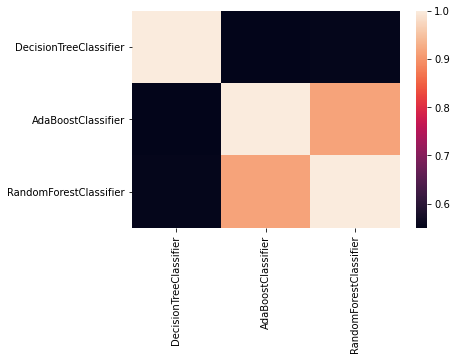

In [4]:
corr = meta_train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

=> Random Forest and AdaBoost are positively correlated => reduce the variance of base classifers

=> Further improvement: Replace Random Forest or AdaBoost by other algorithms